In [1]:
import numpy as np
import matplotlib.pyplot as plt

# `Segundo Bloque`

## Nociones de estadísticas
- Fitting. Regresión lineal de los Mínimos al cuadrado (Linear Least-Squares Fitting)
    - Estadística del método Chi Squared
    - Fit de la linea recta
        - Parámetros de estimación y variancia
    - Fit General para una función normal
        - Ecuaciones normales
- Inferencia estadística lineal
    - Enfoque de máxima verosimilitud (Maximum-Likelihood Approach)
    - Regla de Bayes
- Fitting. Regresión No lineal de los Mínimos al cuadrado (Non-Linear Least-Squares Fitting)
    - Método de Gauss-Newton
    - Redes Neuronales (Artificial Neural Networks)

## Fitting. Regresión lineal de los Mínimos al Cuadrado

Como fue comentado en la conferencia de interpolación, existe un método que aunque no pasa por todo el conjunto de pares de puntos $(x_j, y_j)$ es capaz de capturar la información codificada en los datos. 

¿Cuándo debemos usar esta metodología?

La situación más usual es cuando no podemos creer ciegamente en los datos. Es decir, cuando punto de los datos tiene una incertidumbre de entrada asociada $\sigma_j \to y_j\pm \sigma_j$. En este caso no hemos de exigir que nuestra función aproximada $p(x)$ pase por todos los datos, sino que se intentará encontrar una que sea capaz de capturar el comportamiento de estos (incluyendo su errores asociados). Ahora, como imaginarán existen infinitas opciones para la funcion aproximada $p(x)$, sin embargo usualmente los datos tienen un modelo teórico de fondo el cual tiene ciertos parámetros libres que serían los que ajustaríamos. En el caso que no se conozca dicho modelo, pues pensando un poco en la serie de Taylor se propone un polinomio de $x$, cuyos parámetros libres serían los respectivos coeficientes. IMPORTANTE, en este último caso, se ha de escoger un polinomio de bajo grado, ya que cuanto mayor sea el grado, mayor será el número de parámetros indeterminados: ya que NO confiamos plenamente en los datos de entrada, no queremos capturar la *dispersión* (scatter), sino sólo la tendencia subyacente en los datos.

<center><img src="capturas/223.png"></center>

### Estadística del método Chi Squared

Consideremos una expansión de nuestra aproximación $p(x)$ de la forma:
$$
p(x)=\sum_{k=0}^{n-1} c_k \phi_k(x)
$$
donde $c_k$ serían los coeficientes y $ \phi_k(x)$ las funciones bases las cuales pueden ser o no polinomalies (recordar lo visto en la conferencia de interpolación). Como se aprecia, este es un problema **lineal** en el sentido de que la función de aproximación $p(x)$ es una combinación lineal de los coeficientes $c_k$. A esta función de aproximación en el contexto de Chi Squared le llamaremos **teoría o modelo**.


`Otra particularidad (diferencia)` que se tiene con respecto a la interpolación, es que SIEMPRE tendremos más datos que parámetros libres del modelo (aún cuando usemos un polinomio), es decir $N>n$.

`IMPORTANTE:` Si seguimos la misma idea de la interpolación donde usamos los $N$ datos para encontrar los $n$ parámetros libres, entonces estaríamos ante un sistema sobre-determinado, es decir $\Phi C = y$

<center><img src="capturas/224.png"></center>

Notar que los datos $y_j$ se agrupan en un vector de columna de dimensión $N \times 1$, $\Phi$ es una matriz de $N \times n$ y estaríamos resolviendo el vector de columna $C$ de $n \times 1$ dimension.

Como se puede ver, el sistema no se puede resolver (comparar vectores columnas), e incluso si pudiera, sabemos que nuestros valores $y_j$ adolecen de errores, los cuales no están *capturados*.

`¿QUÉ HACER?`

Para abordar este sistema sobredeterminado y capturar la información del error lo que haremos es `intentar miminizar la norma del vector residual` (recuerden que miminizar es equivalente a encontrar un extremo), es decir
$$
\min ||\Phi C-y||
$$
donde la norma usada sería la [Euclideana](https://es.wikipedia.org/wiki/Norma_vectorial), $||(x_1, \dots, x_n)||=\sqrt{x_1^2+\dots+x_n^2}$. Notar que decimos residual puesto que estamos encontrando la resta. En otras palabras: `encontraremos los valores para` $c_j$ `capaces de darnos el resultado (para esta diferencia) más cercano a cero`.

Vale, hasta acá todo parece lógico, sin embargo, `¿dónde entran las incertidumbres en de los datos?`. Por lo visto hasta ahora nuestro resultado dependerá de la base usada y de los datos de entrada, no de sus errores asociados. Por otro lado, supongamos la siguiente situación:

*Consideremos que algunos de los datos de entrada tienen grandes incertidumbres y tal vez también parezcan mostrar un comportamiento diferente al resto. Uno esperaría que la metodología desarrollada fuera capaz de ponderar los puntos con mayor incertidumbre diferente al resto, es decir, no deberían afectar nuestra aproximación final tanto como los puntos que se midieron con mucha más precisión.*

Bueno, la metodología capaz de capturar la incertidumbre $\sigma_j$ y ponderarla de forma correcta es la llamada estadística chi-cuadrado (estadística porque es función de los datos), la cual consiste en minimizar la función:
$$
\chi^2=\sum_{j=0}^{N-1}\left(\frac{y_j-p(x_j)}{\sigma_j}\right)^2
$$

donde $x_j, y_j$ son las variables independiente y dependiente respectivamente. Nótese que la suma se realiza sobre todos los datos $N$ y que aproxima a la función $p(x)$ dependiendo implícitamente de los parámetros $c_k$. Además se logra lo solicitado, **cuando la incertidumbre de una entrada dada es grande, la contribución de ese término a la suma es pequeña, como debería ser.** 

`¿Ya notan por qué el nombre de mínimos cuadrados?`  De la ecuación se aprecia que miminizaremos $\chi^2$, que no es más que la distancia entre la teoría $p(x_j)$ y los datos $y_j$, ponderada por el tamaño de la barra de error en los últimos.

Bueno, procedamos a miminizar la función respecto a los parámetros libres $c_k$, es decir computemos $\partial \chi^2/\partial c_k$:
<center><img src="capturas/225.png"></center>

`Comentarios`:
- El índice $k=0,1, \dots, n-1$.
- Al tomar la derivada parcial $\partial p(x_j)/\partial c_k$ consideramos *fijos* a $x_j, y_j$.
- Si asumimos que la función de aproximación $p(x)$ es lineal en las $c_k$ (tiene la estructura comentada inicialmente), tendremos que estas derivadas pueden tomarse de manera trivial.

Más adelante profundizaremos en algunas cuestiones estadísticas del resultado anterior. Por ahora centrémosno en como comparar diferentes teorías. Como vimos miminizar la $\chi^2$ nos dice como encontrar las mejores $c_k$ para una teoría dada, sin embargo, ¿qué pasa si la teoría es incorrecta? Pues en este caso el proceso de miminización de mínimos al cuadrado te dará los *mejores* valores, sin embargo el resultado puede seguir siendo inadecuado. Algo que puede notarse al graficar el resultado.

En la práctica si asumimos que los errores se distribuyen normalmente (luego veremos a que nos referimos con esto), si el mínimo de $\chi^2$ es muy grande, de la propia definición se puede apreciar que no se puede obtener un $p(x)$ que se acerque a los puntos de los datos. Lo cual puede estar asociado a un error en el modelo. Por el contrario, si el mínimo de $\chi^2\approx 0$, tendremos que la curva teórica esencialmente pasaría por los datos, lo cual indicaría que el modelo teórico es bueno. `¿cierto?`

Pues bueno, nada es en blanco y negro, depende de otros factores. 
- Por ejemplo, si a la hora de obtener los datos, sus respectivos $\sigma_j$ fueron subestimados (es decir, en realidad son muchos más grandes), en este caso puede que el modelo que parecía malo en principio no lo sea. 
- Otro ejemplo es que tener un modelo con $\chi^2\approx 0$ no siempre es un buen resultado. Puede ocurrir que tengamos demasiados parámetros libres y lo que esté ocurriendo es un *sobreajuste* (overfitting), es decir, estamos capturando la dispersión aleatoria en los datos y no su comportamiento. 
- Otro ejemplo es similar al primero, pero ahora pudieramos tener una sobreestimación de las $\sigma_j$ (es decir, en realidad pudieran ser mucho más pequeños) y por tanto nuestro modelo no es el adecuado aún cuando nos de $\chi^2\approx 0$.

`Entonces la pregunta sería:` ¿cómo interpretar si es un buen resultado o no, tener un valor *grande* o *pequeño* de $\chi^2$?. 

Pues como regla general se suele considerar como buen fit sí, $\chi^2\approx N-n$. Si recuerdan de lo visto en clases, **la diferencia entre el número de puntos de datos y el número de parámetros**, $N − n$, `se conoce como número de grados de libertad`. Por lo tanto, `la regla general se puede reformular diciendo que un ajuste no es demasiado bueno, ni demasiado malo si el chi-cuadrado entre los grado de libertad sea aproximadamente uno.`


`Comentario:` En el caso en que no contemos con los errores $\sigma_j$, podemos asumir que todos son iguales, y la regla general seguirá siendo un buen criterio, y una vez que tengamos el valor de $\chi^2$, usaríamos la expresión:
$$
\chi^2=\sum_{j=0}^{N-1}\left(\frac{y_j-p(x_j)}{\sigma_j}\right)^2
$$
para encontrar el $\sigma$ asumido. Es cierto que esto no te ayuda a comprobar qué tan bien se hizo el ajuste, ya que se asume que fue el mejor, sin embargo es una buena forma de proceder cuando no se cuenta con el error.

### Fit de la linea recta

A continuación vemos como aplicar todo lo anterior a un modelo sencillo, la linea recta:
$$
p(x)=c_0+c_1 x
$$

Consideremos que tenemos $N$ datos tipo $(x_j, y_j)$, con sus respectivos $\sigma_j$. Si evaluamos en la teoría de chi-cuadrado tendremos
<center><img src="capturas/226.png"></center>

donde tendremos que determinar el mejor valor para $c_0, c_1$. Para ello haremos uso de algunas herramientas estadísticas.

#### Parámetros de estimación y variancia

Si miminizamos la función anterior tendremos que:
<center><img src="capturas/227.png"></center>

donde como se aprecia apareción un delta en la derivación. A continuación podemos podemos dividir cada numerador en tres términos y expresar las dos ecuaciones anteriores como:
<center><img src="capturas/229.png"></center>

donde hemos hecho uso de:
<center><img src="capturas/228.png"></center>

Nótese que todas las nuevas variables se expresan en términos de cantidades conocidas, lo que significa que se pueden calcular a partir de los datos. El sistema anterior se puede expresar de forma matricial como
<center><img src="capturas/230.png"></center>

lo que nos lleva, luego de invertir la matriz a que los mejores valores (los que miminizan a $\chi^2$) para las $c_k$ son:
<center><img src="capturas/231.png"></center>

`notar` que las cantidades del lado derecho se pueden computar de los datos.

Bueno, uno estaría tentado a pensar que ¡¡ya quedó!!, sin embargo, hemos pasado algo por alto. Tenemos errores $\sigma_j$, ¿cierto? pues estos han de introducir una incertidumbre que se propagaría en el cálculo de las $c_k$, por ende debemos tener presente en nuestro resultado dicha propagación.

Recordando lo visto en la conferencia de errores, partamos de suponer que los datos son independientes y por tanto la propagación sería de la forma  
<center><img src="capturas/232.png"></center>

donde $g$ para nuestro caso será $c_0, c_1$. Computando las derivadas tendremos:
<center><img src="capturas/233.png"></center>

Notar que se usó los resultados obtenidos para $c_0, c_1$. La primera ecuación nos ayuda a determinar $\sigma^2_{c_0}$ y la segunda $\sigma^2_{c_1}$. Sustituyendo estas en la expresión obtenida de propagar el error, se llega a:
<center><img src="capturas/234.png"></center>

Estas son las variaciones en las estimaciones de nuestros dos parámetros. Para calcular las desviaciones estándar, se tendrña  que sacar la(s) raíz(es) cuadrada(s).

In [10]:
# implementación

# calculando las funciones abreviada de los datos
def funcionesSAbrev(dataxs, datays, datasigs):
    Sf = np.sum(1/datasigs**2)
    Sxf = np.sum(dataxs/datasigs**2)
    Syf = np.sum(datays/datasigs**2)
    Sxxf = np.sum(dataxs**2/datasigs**2)
    Sxyf = np.sum(dataxs*datays/datasigs**2)
    Triangf = Sf*Sxxf - Sxf**2
    return Sf, Sxf, Syf, Sxxf, Sxyf, Triangf

# calculando los coeficientes ck
def computecs(dataxs, datays, datasigs):
    
    # calculando las funciones abreviadas
    Sf, Sxf, Syf, Sxxf, Sxyf, Triangf = funcionesSAbrev(dataxs, datays, datasigs)
    
    # calculando los coeficientes
    cs = np.zeros(2)  # mejor ajuste
    sigcs = np.zeros(2)  # desviación estandar
    
    cs[0] = (Sxxf*Syf - Sxf*Sxyf)/Triangf
    cs[1] = (Sf*Sxyf - Sxf*Syf)/Triangf
    sigcs[0] = np.sqrt(Sxxf/Triangf)  # recordar que Sxxf/Triangf es la varianza
    sigcs[1] = np.sqrt(Sf/Triangf)
    return cs, sigcs

def chisqf(dataxs, datays, datasigs, cs):
    chisq = np.sum((datays-cs[0]-cs[1]*dataxs)**2/datasigs**2)
    return chisq

In [15]:
# ejemplo
dataxs = np.linspace(0, 1, 6)  
datays = np.array([3.085, 3.123, 3.224, 3.360, 3.438, 3.569])
datasigs = np.array([0.048, 0.053, 0.02, 0.005, 0.023, 0.07])

# obteniendo las ck
cs, dcs = computecs(dataxs, datays, datasigs)

print('El mejor ajuste es: c0 =%5.4f, c1=%5.4f'%(cs[0], cs[1]))
print('Las respectivas desviaciones estandar son:', dcs)

# calculando el valor de chi^2
chisq = chisqf(dataxs, datays, datasigs, cs)

print()
print('El valor para \chi^2 es ', chisq)  # notar que este valor no es muy cercano a 0, pero al usar la regla general nos da algo decente
print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))  # notemos como está cercano a 1, lo cual es un fit decente

El mejor ajuste es: c0 =3.0459, c1=0.5189
Las respectivas desviaciones estandar son: [0.02927752 0.04896135]

El valor para \chi^2 es  4.396672782174086
El valor para \chi^2 por grado de libertad es:  1.0991681955435215


Text(0, 0.5, 'y')

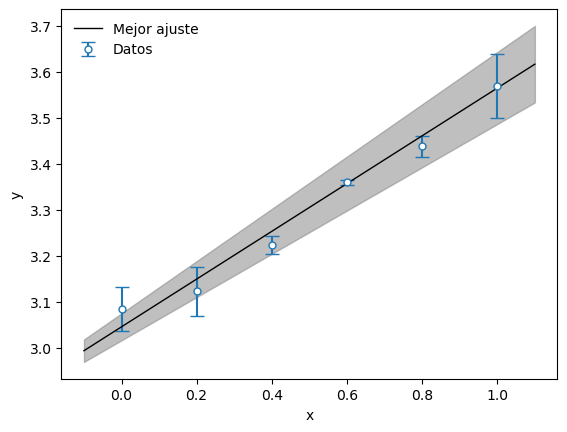

In [34]:
model = lambda x, c0, c1: c0 + c1*x
xval = np.linspace(min(dataxs)-0.1, max(dataxs)+0.1, 50) 

fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=5, mew=1, label=r'Datos')
ax.plot(xval, model(xval, *cs), ls='-', lw=1, c='k', label=r'Mejor ajuste')
ax.fill_between(xval, model(xval, *(cs+dcs)), model(xval, *(cs-dcs)), color='gray', alpha=0.5)
ax.legend(frameon=False)

ax.set_xlabel('x')
ax.set_ylabel('y')

## Fit General para una función normal

A continuación podemos intentar generalizar el procedimiento anterior, sin embargo, es fácil ver que no es tan fácil. Por ejemplo, imaginemos que queremos comprobar si el escoger el modelo lineal fue correcto. Una forma de hacerlo sería probar una teoría cuadrática:
<center><img src="capturas/235.png"></center>

y repetir el procedimiento anterior, pero ahora teniéndo tres parámetros libres. Lo que nos lleva a:
<center><img src="capturas/236.png"></center>

Notar que ahora tenemos nuevos términos tipo $S_{xxxx}$. De lo visto anteriormente sabemos que el invertir una matriz suele acarrear bastantes errores si esta está mal condicionada, en especial si la dimensión es grande. Sin embargo, al realizar un ajuste de mínimos cuadrados, generalmente no se utiliza un polinomio de grado muy alto puesto que como se mencionó esto conduce principalmente a un sobreajuste, es decir, a capturar la dispersión aleatoria en los datos, que es un resultado no deseado. Es decir, normalmente no tendrémos problema de errores al invertir la matriz $3\times 3$. Pero como vimos del modelo lineal nuestro tratamiento es analítico y para matrices de dimensión superior puede ser complicado la inversión, teniéndose que recurrir a métodos numéricos, o a meditar sobre hasta que orden hemos de llegar.

Ahora, que ocurre sino usamos un modelo polínómico, por ejemplo:
<center><img src="capturas/237.png"></center>

Notar que este sigue siendo un modelo lineal en el parámetro libre (en las $c_i$); es sólo una de las funciones de base no es lineal (en $x$) lo que como veremos nos obligará a introducir variables auxiliares como:
<center><img src="capturas/238.png"></center>

lo cual es una generalización directa de lo visto para el caso de la línea recta. Obviamente, si tuvieras tres (o, digamos, siete) parámetros, un tratamiento analítico ya no sería muy práctico.

### Ecuaciones normales

A continuación intentemos abordar el problema anterior (siempre lineal) de forma general, en vez de estudiar modelo a modelo, partamos de la definición vista:
<center><img src="capturas/239.png"></center>

donde los modelos polinomiales son un caso particular cuando los términos de la base $\phi_k(x)$ son monomios.

Implementemos entonces una metodología general que nos permita obtener el mejor ajusta para cualquier conjunto de funciones básicas. De manera directa tendremos que el modelo $\chi^2$ se generalizaría a:
<center><img src="capturas/240.png"></center>

Miminizando tendremos que:
<center><img src="capturas/241.png"></center>

donde $k=0,1,\dots, n-1$. Eliminando el coeficiente $−2$ y reordenando los términos (e intercambiamos el orden de suma) se llega a
<center><img src="capturas/242.png"></center>

lo cual se puede escribir como:

<center><img src="capturas/244.png"></center>

donde introducimos las nuevas variables:
<center><img src="capturas/243.png"></center>

Notar que $A=\{A_{jk}\}$ es una matriz rectángular $N\times n$ (cuyas filas van de $0$ hasta $N-1$ y columnas de $0$ a $n-1$), mientras que $b$ es un vector columna de dimensión $N-1$, compuesto de los los errores asociados a las mediciones. Es decir, los elementos de $A, b$ pueden ser computados de los datos.

Por otro lado, teniendo presente que el producto matricial no es más que:
<center><img src="capturas/248.png"></center>

Notemos que la suma por el índice $j$ se pueden reemplazar mediante la multiplicación matriz-matriz (en el lado izquierdo) y multiplicación matriz-vector (en el lado derecho), es decir
<center><img src="capturas/245.png"></center>

donde se introdujo `apropiadamente` la transpuesta de $A$ ya que necesitábamos que dos índices aparecieran en diferente orden. 

De forma similar podemos percatarnos que la suma sobre $i$ en el lado izquierdo se puede expresar en términos de una multiplicación matriz-vector, lo que nos lleva a escribir:
<center><img src="capturas/246.png"></center>

Como se aprecia esta igualdad es válida para cualquier componente $k$, es decir
<center><img src="capturas/247.png"></center>

`¡Ya cumplimos el objetivo!` Noten que tanto $A$ como $b$ son conocidos (calculados en términos de los datos de entrada), esta ecuación es un sistema lineal simple de ecuaciones: podemos resolverlo usando métodos numéricos matriciales.

`Comentarios:`
- Noten que la dimensión de $A$ es $N \times n$, lo que significa que $A^T$ es $n\times N$ y, por lo tanto, $A^TA$ es $n \times n$.

### Interpretando la aproximación general

A continuación interpretemos el resultado anterior. El objetivo es demostrar que el vector $c$ encontrado no solo corresponde a un punto crítico, sino que represetna un mínimo del modelo. 

Notemos los siguientes detalles:

- El producto $A^T A$ es simétrico producto de que este es igual a su traspuesta.
<center><img src="capturas/249.png"></center>

- El producto $A^T A$ es positivo semidefinido para cualquier vector $x$ no trivial, es decir:
<center><img src="capturas/250.png"></center>

donde la norma usada es la Euclideana.

Si escribimos el vector $A$ en términos de sus columnas $a_i$:
<center><img src="capturas/251.png"></center>

y consideramos que estas son linealmente independientes, entonces el producto $Ax$ quedaría como:
<center><img src="capturas/252.png"></center>

donde la desigualdad con cero es producto de que las columnas son linealmente independiente. 

Con lo anterior hemos demostrado que $||Ax||^2\neq 0$ lo que en conjunto a que es definido positivo tendremos que: $||Ax||^2>0$, es decir, $A^T A$ es definida positiva si las columnas de $A$ son linealmente independientes.

En términos de las cantidades $A, b$ podemos reescribir la generalización del modelo $\chi^2$:
<center><img src="capturas/240.png"></center>

a una forma matricial como: 
<center><img src="capturas/253.png"></center>

donde con toda intención se puso explicitamente la dependencia de los parámetros $c_k$. Expandiendo la expresion vectorial tendremos:
<center><img src="capturas/254.png"></center>

Introduciendo la matriz Hessiana
<center><img src="capturas/255.png"></center>

y realizando una expansión multidimensional de Taylor hasta orden $q^3$ ($q$ vector) tendremos que:
<center><img src="capturas/256.png"></center>

donde ha de notarse que para nuestro caso $H=2A^T A$ (matriz Hessiana), esto es debido a que la única contribución a la segunda derivada vendrá de la forma cuadrática (en c) $c^T A^T A c$.

Ahora puesto que los valores de $c^*$ son aquellos que garantizan que la primera derivada sea cero (punto crítico), es decir 
<center><img src="capturas/257.png"></center>

tendremos entonces que:
<center><img src="capturas/258.png"></center>

lo cual demuestra que los puntos $c_i^*$ son un mínimo siempre y cuando la matriz Hessiana $H$ sea definida positiva.


### Variancia

Similar al caso lineal, ahora hemos de proceder a encontrar la incertidumbres en estas estimaciones, para ello usamos una metodología similar. La relación general a la ecuación de propagación del error sería:
<center><img src="capturas/260.png"></center>

donde similar al caso lineal asumimos que las incertidumbres no están correlacionados, es decir, que las mediciones son independientes. Para calcular $\sigma_{c_i}^2$ necesitaremos la derivada del parámetro $c_i$ con respecto al dato $y_j$, es decir, $\partial c_i/\partial y_j$ para obtenerlaprimero necesitamos escribir $c_i$ como función de $y_j$, veamos como:

Multiplicando nuestra aproximación general
<center><img src="capturas/247.png"></center>

por $(A^T A)^{-1}$ por la izquierda, encontramos:
<center><img src="capturas/261.png"></center>

si definimos 
<center><img src="capturas/262.png"></center>

tendremos que
<center><img src="capturas/263.png"></center>

Notar que lo que hicimos en cada igualdad fue el proceso inverso al realizado para obtener la aproximación general. El resultado final es lo deseado, $c_i$ en función de $y_j$. Puesto que $V_{ik}$ no depende de $y_j$ podemos evaluar directamente la derivada necesaria:
<center><img src="capturas/264.png"></center>

donde notarás que la suma sobre $l$ ya no existe.

Sustituyendo el resultado en la expresión para la dispersión tendremos
<center><img src="capturas/265.png"></center>

donde intercambiamos el orden de suma y cancelamos uno de los $\sigma_{j}^2$. El término dentro del paréntesis también se puede reexpresar como:
<center><img src="capturas/266.png"></center>

donde en la última igualdad nos percatamos que lo obtenido es nuestra matriz $U$. Reintroduciendo este resultado en la expresión previa tendremos
<center><img src="capturas/267.png"></center>

donde en la segunda igualdad reordenamos las sumas y los términos, y en la tercera igualdad nos dimos cuenta de que $V$ es la inversa de $U$, por lo que su producto es la identidad, lo que nos lleva a:
<center><img src="capturas/268.png"></center>

es decir, los elementos diagonales de la matriz $V$ son las varianzas de las estimaciones de los parámetros $c$. 

`Comentario:` 
- Los elementos de la matriz fuera de la diagonal de $V$ son las covarianzas entre diferentes parámetros, es decir, $V_{ik} es la covarianza entre los parámetros $c_i$ y $c_k$. 
- La matriz $V$ se conoce como matriz de *varianza-covarianza*.

### Implementación

A continuación implementemos el método general, para ello primero definiremos una función que nos genere los vectores bases. En particular (y con ánimo de demostrar que este formalismo es general) implementamos dos conjuntos distintos de funciones de base: 
- monomios
- comportamiento sinusoidal

Por supuesto, para ambos casos la dependencia de los $c_k$ es lineal. 

En la función `fbase()` elegimos diferenciar entre los dos tipos diferentes de teoría en función del valor del tamaño del problema, $n$
- $n = 5$ se interpreta como monomios hasta cuarto grado
- $n = 2$ se interpreta como $1$ o como $\sin(x)$.

A continución definimos una metodología general (que aplica a cualquier base) `Gnormalfit`, la cual computará los $c_k$ y calculará el mínimo valor para $\chi^2$. La idea es similar al caso lineal, el único cambio es que esta vez también pasamos explícitamente el número de parámetros, $n$.
Pasos:
- Crear la matriz rectangular $A$ $(N \times n)$, implementando la definición de $A_{jk}
- De manera similar definimos el vector de columna $b$ según su definición.
- Habiendo calculado $A$ y $b$, resolvemos el sistema lineal $A^T A c = A^T b$. Notar que usaremos la abreviación `@` para realizar la multiplicación matriz-matriz o matriz-vector.
- Una vez obtenido los $c_k$ podemos calcular el mínimo $\chi^2$ utilizando su implementación vectorial vista.
- Para calcular 

In [28]:
# Implementación
def fbase(n, k, x):
    if n==5:
        val = x**k
    elif n==2:
        val = 1. if k==0 else np.sin(x)  # 1*c0 + c1*sin(x)
    return val


def Gnormalfit(dataxs, datays, datasigs, n):
    N = dataxs.size
    A = np.zeros((N, n))  # notar la dimensión
    
    for k in range(n):
        A[:, k] = fbase(n, k, dataxs)/datasigs  # A_{jk} = phi_k(x_j)/sigma_j
    bs = datays/datasigs  # b_j = y_j/sigma_j
    
    matI = A.T@A  # np.dot(A.T, A)
    InvmatI = np.linalg.inv(matI) 
    matD = A.T@bs
    cs = InvmatI@matD
    
    sigS = np.diagonal(InvmatI)
    chisq = np.sum((bs - A@cs)**2)  # (bs - A@cs).T@(bs - A@cs)
    
    return cs, chisq, sigS

In [29]:
# ejemplo

# generando datos
N = 8
np.random.seed(45379)  # fijando la semilla
dataxs = np.linspace(0, 9, N)
datays = 2 + 5*np.sin(dataxs) + 0.3*np.random.randn(N)  # la última parte es el ruido
datasigs = 0.2*np.abs(np.random.randn(N))

csVal, sigVal = [], []
for n in (5, 2):
    cs, chisq, sigS = Gnormalfit(dataxs, datays, datasigs, n)
    csVal.append(cs)
    sigVal.append(np.sqrt(sigS))
    print()
    print('El valor para \chi^2 es ', chisq) 
    print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
    print('El valor de los parámetros c_i son ', cs)


El valor para \chi^2 es  92.61586999122268
El valor para \chi^2 por grado de libertad es:  30.871956663740892
El valor de los parámetros c_i son  [ 1.47186742 12.67496537 -7.59753631  1.34261678 -0.07237913]

El valor para \chi^2 es  20.520842575950716
El valor para \chi^2 por grado de libertad es:  3.4201404293251194
El valor de los parámetros c_i son  [1.96876068 5.19901685]


(-5.0, 12.5)

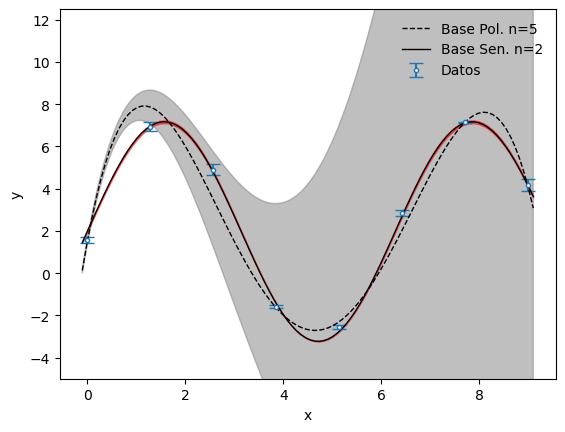

In [30]:
model = lambda x, c0, c1, c2, c3, c4: c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4
model2 = lambda x, c0, c1: c0+c1*np.sin(x)
xval = np.linspace(min(dataxs)-0.1, max(dataxs)+0.1, 100) 

fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, model(xval, *csVal[0]), ls='--', lw=1, c='k', label=r'Base Pol. n=%d'%len(csVal[0]))
ax.plot(xval, model2(xval, *csVal[1]), ls='-', lw=1, c='k', label=r'Base Sen. n=%d'%len(csVal[1]))

ax.fill_between(xval, model(xval, *(csVal[0]+sigVal[0])), model(xval, *(csVal[0]-sigVal[0])), color='gray', alpha=0.5)
ax.fill_between(xval, model2(xval, *(csVal[1]+sigVal[1])), model2(xval, *(csVal[1]-sigVal[1])), color='red', alpha=0.5)

ax.legend(frameon=False)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(-5, 12.5)

## Inferencia estadística lineal

Anteriormente tratamos la regresión lineal (ajuste lineal) como un problema de optimización donde se asumía el modelo de $\chi^2$ y se míminizaba, llegando a la fórmula general. Durante los diferentes procedimientos partimos del supuesto de que las incertidumbres de los datos de entrada se distribuyen normalmente y que la estimación obtenída correspondía a la máxima verosimilitud (en ingles maximum-likelihood parameter estimation). A continuación expliquemos un poco más al respecto.

`IMPORTANTE:`
Antes de continuar, es necesario tener claro el concepto de regresión lineal. En métodos numéricos, usualmente cuando usamos el término `fitting` significa que `existe una relación exacta` entre dos cantidades medidas, mientras que al usar el término `regresión` nos referimos a que se extraerá algún tipo de correlación entre dos cantidades, incluso en ausencia de un modelo que explique esta dependencia; En la práctica (y como han visto en clase), los dos términos `– fitting y regresión –` a menudo se usan indistintamente, a pesar de sus diferencias.

### Enfoque de máxima verosimilitud (Maximum-Likelihood Approach)

Anteriormente en la conferencia de interpolacón vimos que la idea era asumir que los datos de entrada cumplian que:
<center><img src="capturas/269.png"></center>

lo que garantizaba que la función de interpolación pasara por los puntos. Sin embargo, para el fitting la idea era garantizar que 
$$
\min ||\Phi C-y||
$$
lo cual nos llevaba a considerar y miminizar el modelo $\chi^2$ el cual como vimos empíricamente era capaz de capturar los comportamientos que deseabamos de los datos. Sin embargo, nunca justificamos más allá de lo informal el modelo.

A continuación profundicemos un poco en algunas ideas estadísticas.

### Generación de los datos. Su distribución generadora.

Ahora decidimos modelar explícitamente la discrepancia entre teoría y experimento mediante:

<center><img src="capturas/270.png"></center>

donde asumiremos la $y$-estilizada como los valores de los datos y la $c$ estrella como los valores *correctos* de los parámetros. Los términos de error (o ruido) son definidos mediante la última variable de la derecha. Si realizamos la sumatioria por $k$ tendremos un producto vectorial, quedando:

<center><img src="capturas/271.png"></center> 

Ahora discutamos y pensemos que son los datos de entrada. El valor de cada dato no tienen porque verse como números únicos estancados (exactos). En cambios podemos ver cada uno de ellos como una medida individual extraida de una `distribución padre` específica cuyo valor medio sería $\phi_j c_\star$ (para el modelo correcto) y desviación estandar $\sigma_j$. Podríamos ahora imaginar que se extrae (de la misma distribución) para el mismo $x_j$ otro valor $y_j$, tendremos entonces que la diferencia entre ese nuevo $y_j$ y $\phi_j c_\star$ sería entonces un valor aleatorio el cual es codificado en $\epsilon_j$.

`Es importante dejar claro que para una` $x_j$ `existe un único valor verdadero del modelo` $\phi_j c_\star$, `pero existen varios valores de` $y_j$ `que pueden extraerse de este.`

Ahora hagamos una suposición adicional, que la distribución principal de $y_j$ es gaussiana. Acá es valido hacer un paréntesis puesto que hay situaciones en que esto no es cierto, por ejemplo, cuando realizamos esperimentos discretos y sacamos el error por conteo (histograma, etc.). Sin embargo, esta idea también se puede aplicar asumiendo una normalidad asintótica (es decir, que si hicieramos un conteo lo suficientemente grande, se cumpliría esta distribución). En cualquier caso, asumimos explicitamente el hecho de que la gaussianidad de la distribución padre. 

Nótese que hemos usado los términos distribución y función de densidad como sinónimos; así como distribución gaussiana y distribución normal:

<center><img src="capturas/272.png"></center> 

donde $\mu$ es la media (señala la posición del pico), y $\sigma$ la desviación estandar (señala el ancho de la distribución, es decir, su disperción). Notar que en la notación usada no señalamos la variable independiente $x$.

Usando la distribución normal, podemos reformular matemáticamente lo comentado anteriormente como:
<center><img src="capturas/273.png"></center> 

donde lo obtenido no es más que `la función de densidad de probabilidad`. 

Esta ecuación nos da la función de densidad del $j$-ésimo dato, sin embargo estmos interezados en la función de densidad completa, es decir $P(y_0, y_1, \dots , y_{N−1}; c_\star, \phi_0, \phi_1, \dots, \phi_{N−1}, \sigma_0, \sigma_1, \dots , \sigma_{N−1})$. Esta función nos daría la densidad de probabilidad conjunta correspondiente a todo el conjunto de datos. Cualitativamente, esto nos dice qué tan probable es que haya ocurrido el conjunto de datos observado, fijando la teoría verdadera y los parámetros verdaderos, $c_\star$. Como saben de probabilidades, esto no es más que una productoria:

<center><img src="capturas/274.png"></center> 




 - 
    - Regla de Bayes